# Project: Linear models

## Programming project:  Predicting Apartment Prices in Barcelona 2023

As the real estate market in Barcelona continues to evolve, accurate prediction of apartment prices has become a vital aspect for buyers, sellers, investors, and real estate professionals alike. Understanding the factors that influence property values and being able to forecast future prices is crucial for making informed decisions and maximizing returns on real estate investments.

This assessment aims to delve into the art and science of predicting apartment prices in Barcelona in the year 2023. By analyzing historical data, market trends, and key determinants that impact property values, we will endeavor to develop a robust predictive model capable of estimating apartment prices with a high degree of accuracy.

Data (*Regression_Train.csv*) consist of a list of features plus the resulting <i>price</i>, described below. Each row corresponds to a particular appartment price. Properties are defined by <i>id</i>. 

+ Using this data build a predictive model for <b>price</b> 
+ In your analysis for faster algorithms use the MSE criterion for choosing any hyperparameters 
+ Try a first quick implementation, then try to optimize hyperparameters
+ For this analysis there is an extra test dataset. Once your code is submitted we will run a competition to see how you score in the test data. Hence have prepared also the necessary script to compute the MSE estimate on the test data once released.
+ Bonus: Try an approach to fill NA without removing features or observations, and check improvements.

## 1. You can follow those **steps** in your first implementation:

1. **Dataset Exploration:** Begin by thoroughly exploring and understanding the dataset you are working with. Gain insights into its structure, variables, and any potential patterns or trends that may exist within the data.

2. **Handling Missing Data:** Identify and report any missing data present in the dataset. Implement suitable strategies to handle missing values, such as imputation or elimination, ensuring the integrity and quality of the data.

3. **Addressing Categorical Features and Outliers:** Process the categorical features within the dataset, converting them into a suitable format for machine learning algorithms. Additionally, detect and handle any outliers that may affect the model's performance and make appropriate adjustments or treatments.

4. **Model Building:** Construct your machine learning model using the preprocessed dataset. Utilize an appropriate algorithm based on the nature of your prediction task and the available data. Train the model on the input data and evaluate its performance.

5. **Assessing Accuracy with Cross-Validation:** Optionally, employ cross-validation techniques to assess the expected accuracy of your model. This will help validate the model's generalization capabilities and provide more robust performance metrics.

6. **Identifying Impactful Variables:** Analyze the model's results and identify which variables have the most significant impact on the prediction outcomes. Report these variables, as they offer valuable insights into the factors that drive the predicted prices.

It is recommended to iterate and refine the steps mentioned above based on the performance results obtained during step 5. This iterative process will enable you to enhance the accuracy and overall effectiveness of your model. 


## 2. Main criteria for grading
From more to less important (the weighting of these components will vary between the in-class and extended projects):
+ Code runs
+ Price prediction made
+ Accuracy of predictions for test properties is calculated (kaggle)
+ Linear Model, Ridge and LASSO have been used
+ Accuracy itself
+ Data exploration
+ Data preparation
+ Hyperparameter optimization (alphas)
+ Code is combined with neat and understandable commentary, with some titles and comments (demonstrate you have understood the methods and the outputs produced)
+ Insights obtained

## 3. Data provided

Here are the definitions for each of the variables:

* **num_rooms:** This variable represents the number of bedrooms in an apartment.

* **num_baths:** It refers to the number of bathrooms in an apartment, indicating the count of spaces equipped with facilities for personal hygiene, such as toilets, sinks, and showers or baths.

* **square_meters:** This variable represents the total area or size of the apartment, measured in square meters. It provides an indication of the spatial extent or physical footprint of the property.

* **orientation:** It refers to the cardinal or directional aspect of the apartment, specifying the compass direction it faces or the direction in which its windows are oriented.

* **year_built:** This variable represents the year in which the apartment was constructed or built, providing an indication of its age and potential implications for its condition, architectural style, and infrastructure.

* **door:** It refers to the specific door number or identifier associated with the apartment within a building or complex. It distinguishes one apartment from another within the same property.

* **is_furnished:** This variable indicates whether the apartment is offered or equipped with furniture. It helps determine whether the tenant or buyer will have access to pre-existing furnishings or whether they need to provide their own.

* **has_pool:** It denotes whether the apartment has a swimming pool as part of its amenities or shared facilities. This feature adds a recreational element and can influence the desirability and value of the property.

* **neighborhood:** This variable represents the specific neighborhood or locality in which the apartment is situated within Barcelona. It provides geographical context and helps capture the characteristics and amenities associated with that area.

* **num_crimes:** It refers to the count or frequency of reported crimes that have occurred in the vicinity of the apartment's location or neighborhood. It serves as an indicator of safety and security within the area.

* **has_ac:** This variable indicates whether the apartment is equipped with an air conditioning system, offering cooling or heating capabilities to maintain a comfortable indoor temperature.

* **accepts_pets:** It denotes whether the apartment allows or accepts pets as tenants or residents. This variable is essential for individuals with pets who are seeking suitable accommodations.

* **num_supermarkets:** This variable represents the count or availability of supermarkets in close proximity to the apartment. It reflects the ease of access to grocery shopping facilities in the neighborhood.

* **price:** It represents the price of the apartment, typically measured in a specific currency (e.g., Euros). It is the dependent variable in the prediction task and serves as the target value to be estimated or predicted using the other variables.

## 4. Kaggle submission

Once you have produced testset predictions you can submit these to <i> kaggle </i> in order to see how your model performs and compete with your collegues. 

The following code provides an example of generating a <i> .csv </i> file to submit to kaggle
1. Create a pandas dataframe with two columns, one with the test set "id"'s and the other with your predicted "price" for that observation

2. Use the <i> .to_csv </i> pandas method to create a csv file. The <i> index = False </i> is important to ensure the <i> .csv </i> is in the format kaggle expects 

In [954]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [955]:
# Load data

filename = 'data/train.csv'
df = pd.read_csv(filename)
df.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


## Data exploration

In [956]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 937.6+ KB


In [957]:
# Summary statistics for numerical columns

df.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000


In [958]:
#  Check for missing values

print(df.isnull().sum())

id                     0
num_rooms              0
num_baths            160
square_meters        155
orientation         2341
year_built           170
door                 149
is_furnished         165
has_pool             156
neighborhood         165
num_crimes           160
has_ac               169
accepts_pets         155
num_supermarkets    6589
price                  0
dtype: int64


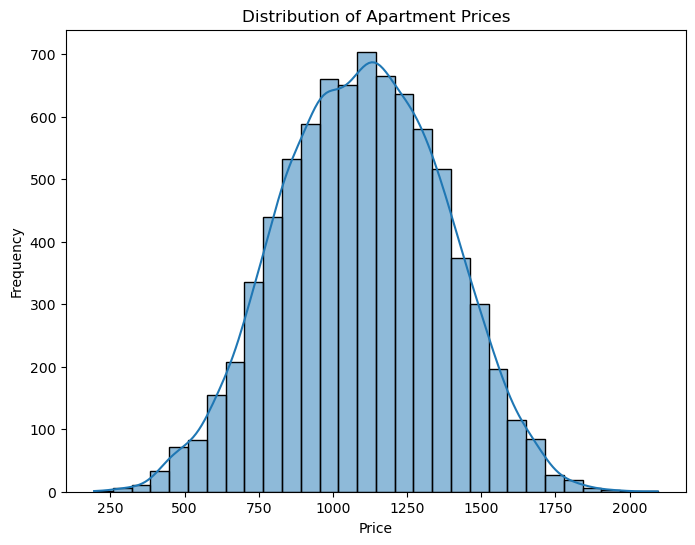

In [959]:
# Visualize the distribution of the target variable 'price'

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [960]:
# Extract floor information and convert it to numerical format

df['floor'] = df['door'].str.extract(r'(\d+)º').astype(float)

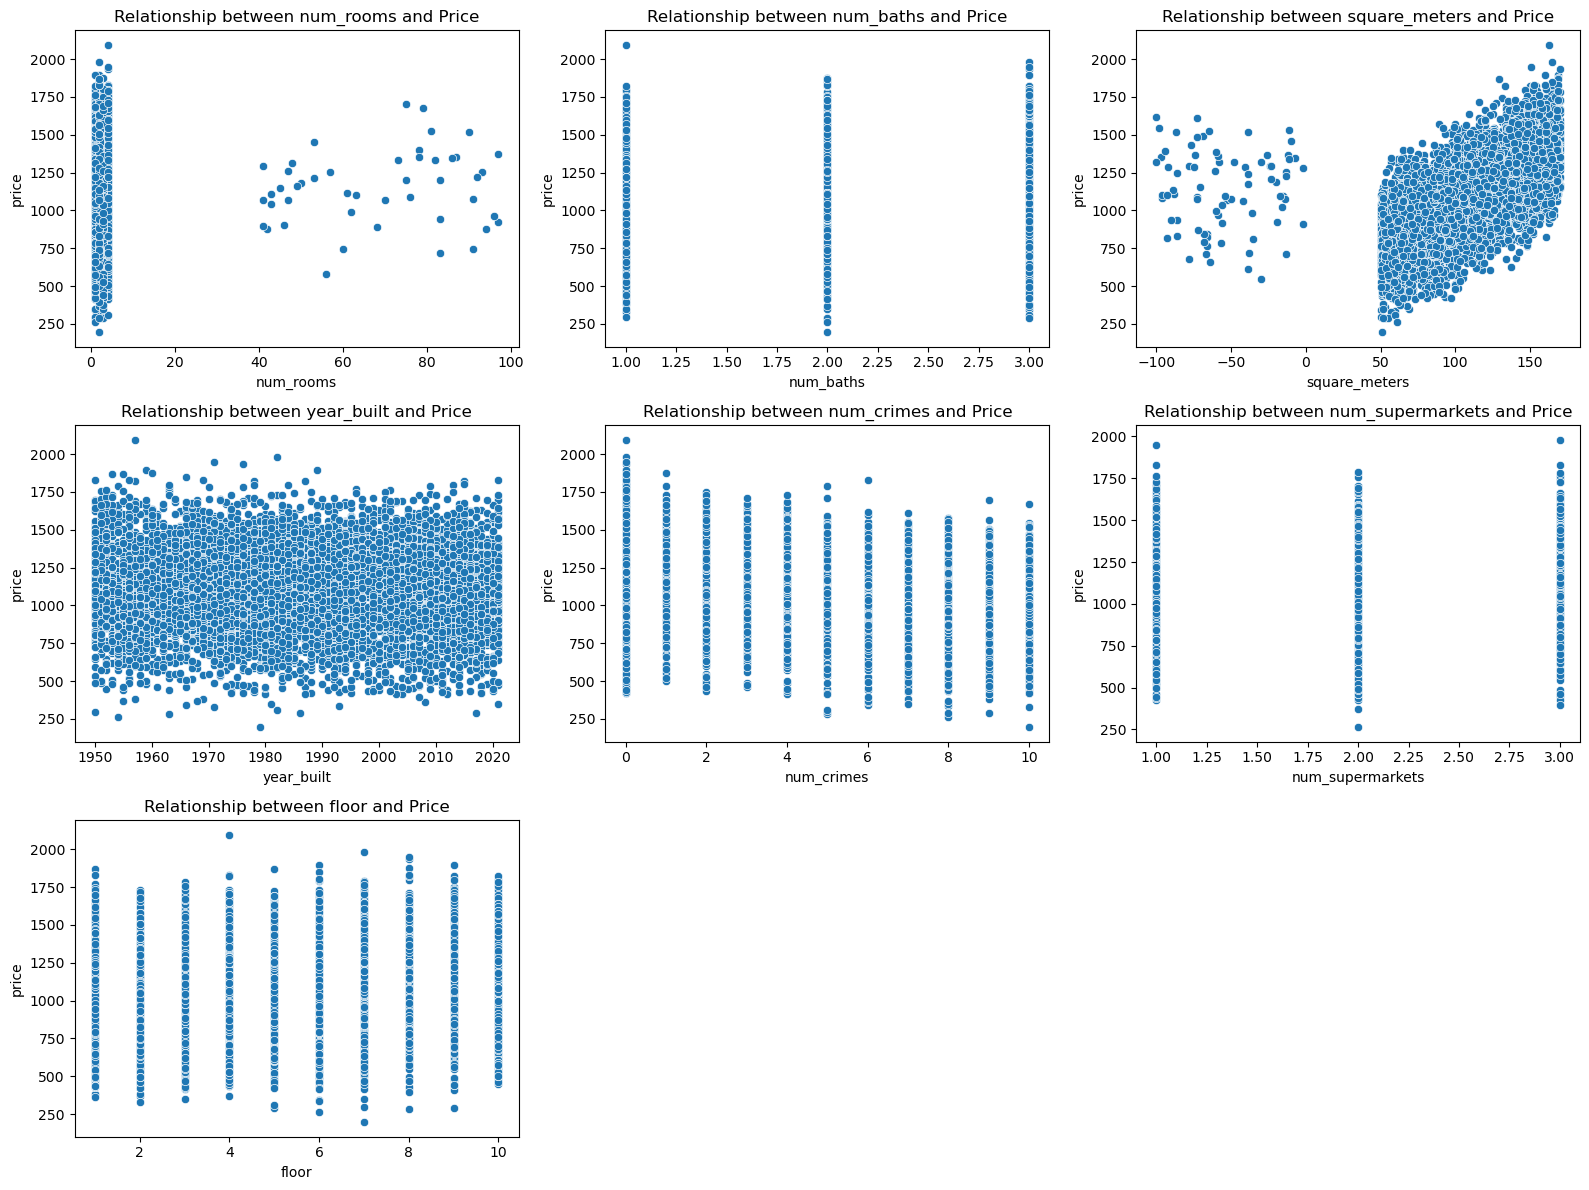

In [961]:
# Visualize the relationships between numerical features and the target 'price'

numerical_features = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'num_supermarkets', 'floor']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'Relationship between {feature} and Price')

plt.tight_layout()
plt.show()

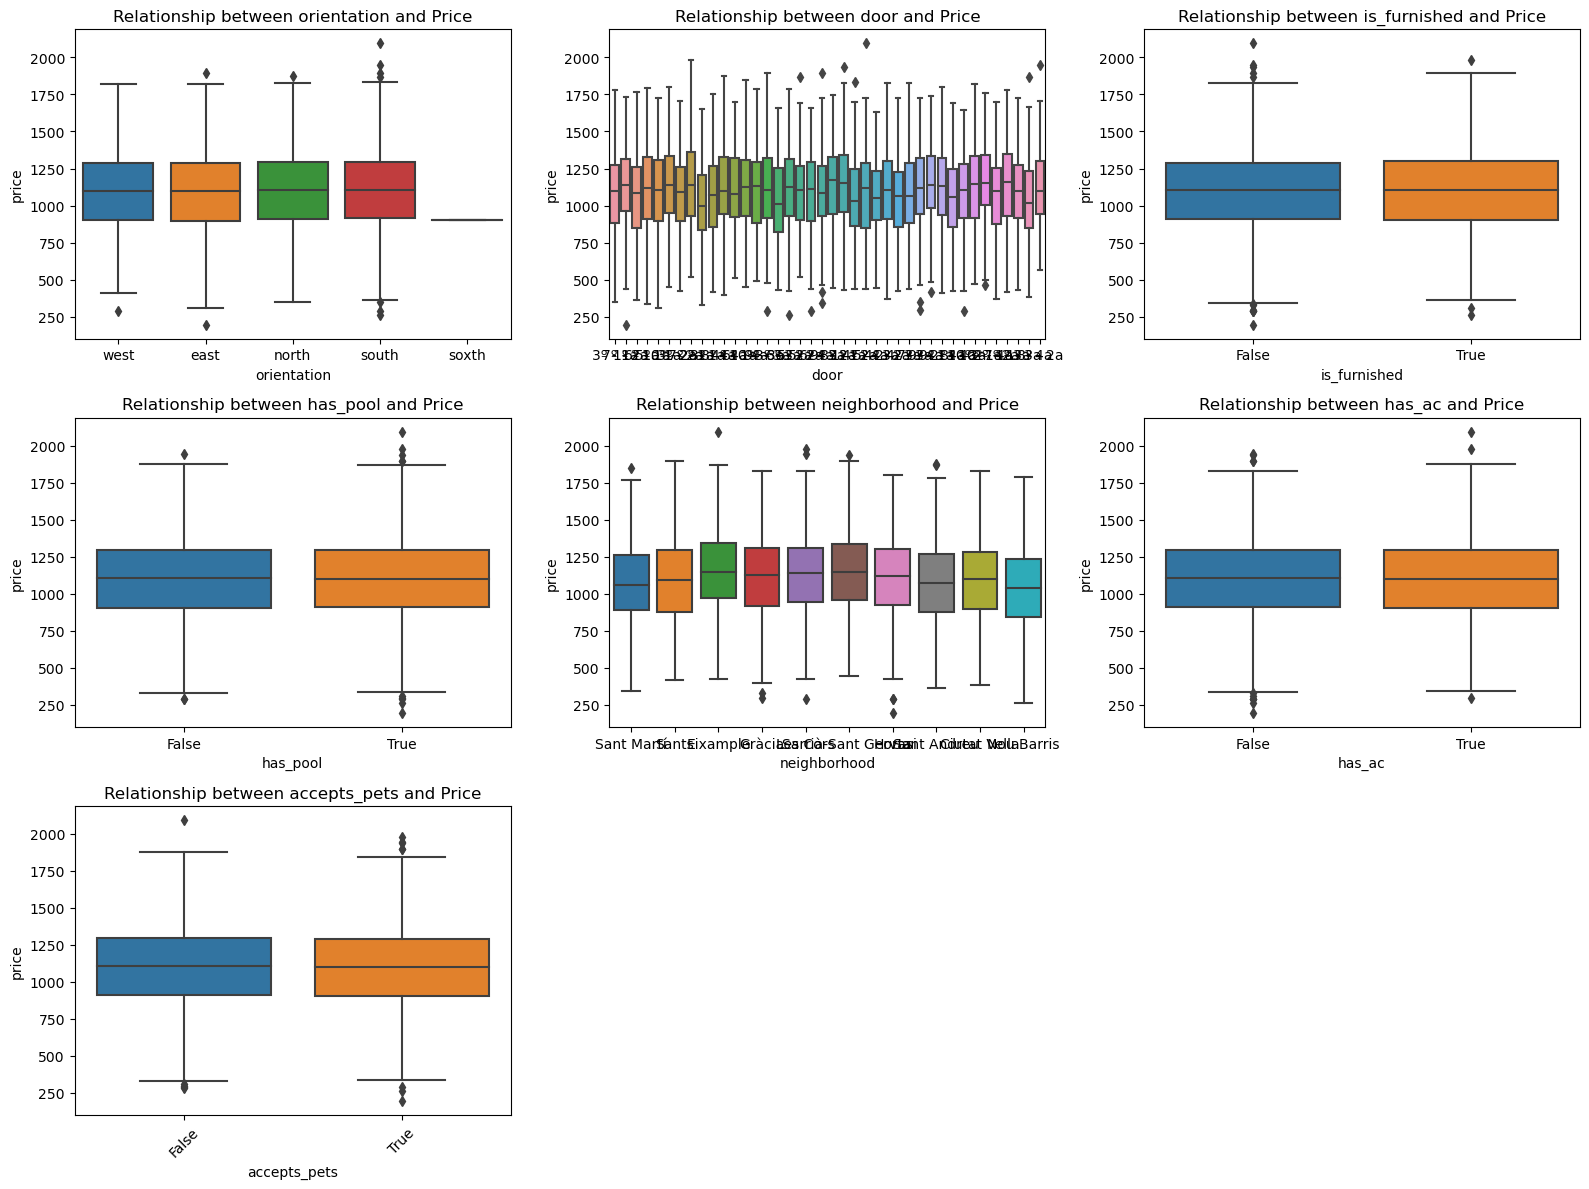

In [962]:
# Visualize categorical variables like 'orientation', 'door', 'is_furnished', 'has_pool', 'neighborhood', 'has_ac', 'accepts_pets'

categorical_features = ['orientation', 'door', 'is_furnished', 'has_pool', 'neighborhood', 'has_ac', 'accepts_pets']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'Relationship between {feature} and Price')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

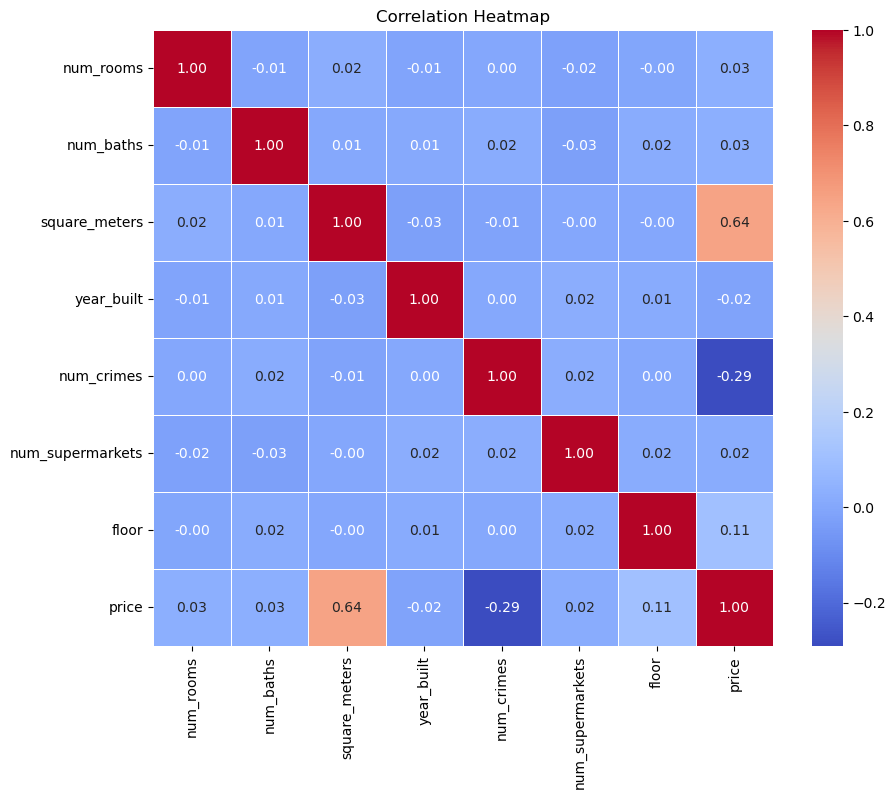

In [963]:
# Correlation heatmap for numerical features

correlation_matrix = df[numerical_features + ['price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data prepocessing

In [964]:
# Drop columns

df = df.drop(['door', 'num_supermarkets', 'orientation'], axis=1)

In [965]:
df['square_meters'] = df['square_meters'].apply(lambda x: np.nan if x < 0 else x)
df['num_rooms'] = df['num_rooms'].apply(lambda x: np.nan if x > 10 else x)

In [966]:
# Define a function to replace outliers with NaN

def replace_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# Specify the columns for which you want to replace outliers with NaN
columns_to_replace_outliers = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'price', 'floor']

# Replace outliers with NaN in the specified columns
for column_name in columns_to_replace_outliers:
    df[column_name] = replace_outliers_with_nan(df[column_name])
    

df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,floor
0,9255,1.0,1.0,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096.0,3.0
1,1562,4.0,1.0,133.0,1960.0,False,False,Sants,4.0,False,False,1396.0,7.0
2,1671,2.0,3.0,137.0,2000.0,False,True,Eixample,0.0,False,False,1263.0,1.0
3,6088,1.0,2.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290.0,6.0
4,6670,2.0,1.0,70.0,1979.0,True,False,Gràcia,0.0,False,True,962.0,5.0


In [967]:
# Select the numerical columns you want to impute missing values for
numerical_columns = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes',  'floor', 'price']

# Create a copy of the data to avoid modifying the original dataset
#data_imputed = df.copy()

# Initialize the StandardScaler to standardize the numerical columns
scaler = StandardScaler()

# Fit and transform the scaler on the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Initialize the KNNImputer with the number of neighbors (k) you prefer
knn_imputer = KNNImputer(n_neighbors=3)  # You can adjust the value of 'n_neighbors'

# Fit and transform the imputer on the standardized numerical columns
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])


# Inverse transform the standardized data to get the imputed values back to the original scale
df[numerical_columns] = scaler.inverse_transform(df[numerical_columns])

# Verify that imputed values are now in the original scale
df.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,floor
0,9255,1.0,1.0,133.333333,1956.0,False,False,Sant Martí,2.0,True,True,1096.0,3.0
1,1562,4.0,1.0,133.000000,1960.0,False,False,Sants,4.0,False,False,1396.0,7.0
2,1671,2.0,3.0,137.000000,2000.0,False,True,Eixample,0.0,False,False,1263.0,1.0
3,6088,1.0,2.0,156.666667,2002.0,False,True,Sants,5.0,False,False,1290.0,6.0
4,6670,2.0,1.0,70.000000,1979.0,True,False,Gràcia,0.0,False,True,962.0,5.0


In [968]:
# List of categorical and boolean column names
categorical_columns = ['is_furnished', 'has_pool', 'neighborhood', 'has_ac', 'accepts_pets']

# Perform mode imputation for each categorical and boolean column
for column_name in categorical_columns:
    mode_value = df[column_name].mode()[0]  # Calculate the mode
    df[column_name].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that missing values have been imputed
df.head()



,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,floor
0,9255,1.0,1.0,133.333333,1956.0,False,False,Sant Martí,2.0,True,True,1096.0,3.0
1,1562,4.0,1.0,133.000000,1960.0,False,False,Sants,4.0,False,False,1396.0,7.0
2,1671,2.0,3.0,137.000000,2000.0,False,True,Eixample,0.0,False,False,1263.0,1.0
3,6088,1.0,2.0,156.666667,2002.0,False,True,Sants,5.0,False,False,1290.0,6.0
4,6670,2.0,1.0,70.000000,1979.0,True,False,Gràcia,0.0,False,True,962.0,5.0


In [969]:
df.groupby('accepts_pets')['price'].mean()

accepts_pets
False    1103.258722
True     1096.320612
Name: price, dtype: float64

In [970]:
df.groupby('has_ac')['price'].mean()

has_ac
False    1101.514043
True     1097.929109
Name: price, dtype: float64

In [971]:
df.groupby('is_furnished')['price'].mean()

is_furnished
False    1097.791055
True     1101.770270
Name: price, dtype: float64

In [972]:
# Extract the 'neighborhood' column
neighborhood_column = df['neighborhood']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop=None, handle_unknown='error')  # 'drop='first' removes one category to avoid multicollinearity

# Fit and transform the encoder on the 'neighborhood' column
neighborhood_encoded = encoder.fit_transform(neighborhood_column.values.reshape(-1, 1))

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(['neighborhood'])

# Create a DataFrame with the encoded neighborhood columns
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=encoded_feature_names)

# Concatenate the encoded columns with the original data
data_encoded = pd.concat([df, neighborhood_encoded_df], axis=1)

# Drop the original 'neighborhood' column
data_encoded.drop('neighborhood', axis=1, inplace=True)


/Users/viktoriia/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [973]:
X_train = data_encoded[['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
       'floor', 'neighborhood_Eixample', 'neighborhood_Gràcia',
       'neighborhood_Horta', 'neighborhood_Les Cors',
       'neighborhood_Nou Barris', 'neighborhood_Sant Andreu',
       'neighborhood_Sant Martí', 'neighborhood_Sants',
       'neighborhood_Sarrià-Sant Gervasi']]
y_train = data_encoded['price']

## Prepare test data

In [974]:
test = pd.read_csv('data/test.csv')
test.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets
0,6253,NaN,1.0,152.0,NaN,2012.0,5º - 4a,True,True,Les Cors,0.0,False,False,NaN
1,4685,NaN,2.0,90.0,east,1957.0,10º - 1a,True,False,Ciutat Vella,2.0,False,True,3.0
2,1732,NaN,2.0,86.0,NaN,1991.0,5º - 2a,False,False,Eixample,0.0,False,True,NaN
3,4743,NaN,3.0,164.0,NaN,2002.0,8º - 4a,False,True,Nou Barris,7.0,False,False,NaN
4,4522,NaN,1.0,99.0,NaN,1984.0,8º - 4a,True,True,Sant Andreu,0.0,True,False,3.0


In [975]:
test.shape

(2000, 14)

In [976]:
print(test.isnull().sum())

id                     0
num_rooms            191
num_baths             40
square_meters         43
orientation          523
year_built            30
door                  51
is_furnished          35
has_pool              44
neighborhood          35
num_crimes            40
has_ac                31
accepts_pets          45
num_supermarkets    1626
dtype: int64


In [977]:
test['floor'] = test['door'].str.extract(r'(\d+)º').astype(float)

test = test.drop(['door', 'num_supermarkets', 'orientation'], axis=1)

In [978]:
test['square_meters'] = test['square_meters'].apply(lambda x: np.nan if x < 0 else x)
test['num_rooms'] = test['num_rooms'].apply(lambda x: np.nan if x > 10 else x)

In [979]:
# Specify the columns for which you want to replace outliers with NaN
columns_to_replace_outliers = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'floor']

# Replace outliers with NaN in the specified columns
for column_name in columns_to_replace_outliers:
    test[column_name] = replace_outliers_with_nan(test[column_name])
    
test.head()

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,floor
0,6253,NaN,1.0,152.0,2012.0,True,True,Les Cors,0.0,False,False,5.0
1,4685,NaN,2.0,90.0,1957.0,True,False,Ciutat Vella,2.0,False,True,10.0
2,1732,NaN,2.0,86.0,1991.0,False,False,Eixample,0.0,False,True,5.0
3,4743,NaN,3.0,164.0,2002.0,False,True,Nou Barris,7.0,False,False,8.0
4,4522,NaN,1.0,99.0,1984.0,True,True,Sant Andreu,0.0,True,False,8.0


In [980]:
numerical_columns = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'floor']

n_neighbors = 5  # You can adjust this value
knn_imputer = KNNImputer(n_neighbors=n_neighbors)

# Fit and transform the imputer on X_test
test_imputed[numerical_columns] = knn_imputer.fit_transform(test_imputed[numerical_columns])

In [981]:
# List of categorical and boolean column names
categorical_columns = ['is_furnished', 'has_pool', 'neighborhood', 'has_ac', 'accepts_pets']

# Perform mode imputation for each categorical and boolean column
for column_name in categorical_columns:
    mode_value = test_imputed[column_name].mode()[0]  # Calculate the mode
    test_imputed[column_name].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Verify that missing values have been imputed
test_imputed.head()



,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,floor
0,6253,3.0,1.0,152.0,2012.0,True,True,Les Cors,0.0,False,False,5.0
1,4685,3.0,2.0,90.0,1957.0,True,False,Ciutat Vella,2.0,False,True,10.0
2,1732,3.0,2.0,86.0,1991.0,False,False,Eixample,0.0,False,True,5.0
3,4743,3.0,3.0,164.0,2002.0,False,True,Nou Barris,7.0,False,False,8.0
4,4522,3.0,1.0,99.0,1984.0,True,True,Sant Andreu,0.0,True,False,8.0


In [982]:
# Extract the 'neighborhood' column
neighborhood_column = test_imputed['neighborhood']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')  # 'drop' removes one category to avoid multicollinearity

# Fit and transform the encoder on the 'neighborhood' column
neighborhood_encoded = encoder.fit_transform(neighborhood_column.values.reshape(-1, 1))

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(['neighborhood'])

# Create a DataFrame with the encoded neighborhood columns
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded, columns=encoded_feature_names)

# Concatenate the encoded columns with the original data
test_encoded = pd.concat([test_imputed, neighborhood_encoded_df], axis=1)

# Drop the original 'neighborhood' column
test_encoded.drop('neighborhood', axis=1, inplace=True)

# Now, data_encoded contains the one-hot encoded neighborhood columns


/Users/viktoriia/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [983]:
test_encoded.columns

Index(['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
       'floor', 'neighborhood_Eixample', 'neighborhood_Gràcia',
       'neighborhood_Horta', 'neighborhood_Les Cors',
       'neighborhood_Nou Barris', 'neighborhood_Sant Andreu',
       'neighborhood_Sant Martí', 'neighborhood_Sants',
       'neighborhood_Sarrià-Sant Gervasi'],
      dtype='object')

In [984]:
X_test = test_encoded[['num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
         'floor', 'neighborhood_Eixample', 'neighborhood_Gràcia',
       'neighborhood_Horta', 'neighborhood_Les Cors',
       'neighborhood_Nou Barris', 'neighborhood_Sant Andreu',
       'neighborhood_Sant Martí', 'neighborhood_Sants',
       'neighborhood_Sarrià-Sant Gervasi']]

In [985]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on X_train
X_train = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test = scaler.transform(X_test)


## Train the model

In [986]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Train Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)


y_pred_lr = np.reshape(y_pred_lr, (-1,))
y_pred_ridge = np.reshape(y_pred_ridge, (-1,))
y_pred_lasso = np.reshape(y_pred_lasso, (-1,))


In [987]:
# Specify the number of cross-validation folds (e.g., 5-fold)
num_folds = 5

# Perform cross-validation and use "MSE" as the scoring metric
mse_scores_lr = -cross_val_score(lr_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of MSE
mean_mse_lr = mse_scores_lr.mean()
std_mse_lr = mse_scores_lr.std()

# Print the results
print(f"Mean MSE: {mean_mse_lr:.2f}")
print(f"Standard Deviation of MSE: {std_mse_lr:.2f}")

Mean MSE: 27585.69
Standard Deviation of MSE: 646.47


In [988]:
# Specify the number of cross-validation folds (e.g., 5-fold)
num_folds = 5

# Perform cross-validation and use "MSE" as the scoring metric
mse_scores_ridge = -cross_val_score(ridge_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of MSE
mean_mse_ridge = mse_scores_ridge.mean()
std_mse_ridge = mse_scores_ridge.std()

# Print the results
print(f"Mean MSE: {mean_mse_ridge:.2f}")
print(f"Standard Deviation of MSE: {std_mse_ridge:.2f}")

Mean MSE: 27585.67
Standard Deviation of MSE: 646.10


In [989]:
# Specify the number of cross-validation folds (e.g., 5-fold)
num_folds = 5

# Perform cross-validation and use "MSE" as the scoring metric
mse_scores_lasso = -cross_val_score(lasso_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of MSE
mean_mse_lasso = mse_scores_lasso.mean()
std_mse_lasso = mse_scores_lasso.std()

# Print the results
print(f"Mean MSE: {mean_mse_lasso:.2f}")
print(f"Standard Deviation of MSE: {std_mse_ridge:.2f}")

Mean MSE: 27555.26
Standard Deviation of MSE: 646.10


In [990]:
# Produce .csv for kaggle testing 
test_predictions_submit = pd.DataFrame({"id": test_encoded["id"].values, "price": y_pred_lasso})
test_predictions_submit.to_csv("predictions/test_predictions_submit_lasso.csv", index = False)